In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/loan_data_set.csv'

In [3]:
data=pd.read_csv(loan)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Quantile base and flooring and caping methods

In [4]:
arr=np.array([10,25,34,67,75,48,96,29])
arr

array([10, 25, 34, 67, 75, 48, 96, 29])

In [5]:
np.where(arr % 5==0 ,300,arr)

array([300, 300,  34,  67, 300,  48,  96,  29])

In [6]:
data['LoanAmount'].quantile(0.90)

235.79999999999995

In [7]:
data['LoanAmount'].quantile(0.10)

71.0

<Axes: >

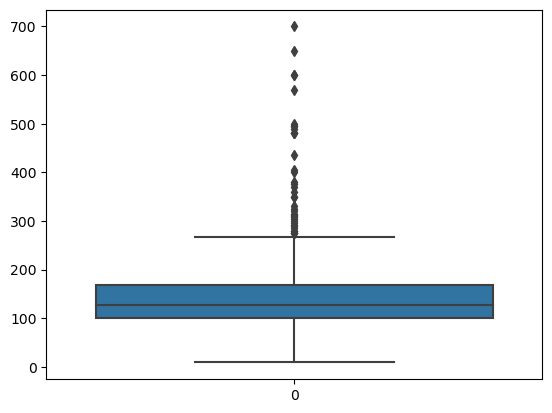

In [8]:
sns.boxplot(data['LoanAmount'])

In [9]:
data['LoanAmount']=np.where(data['LoanAmount'] > 235, 235, data['LoanAmount'])

In [10]:
data['LoanAmount']=np.where(data['LoanAmount'] < 71, 71, data['LoanAmount'])

<Axes: >

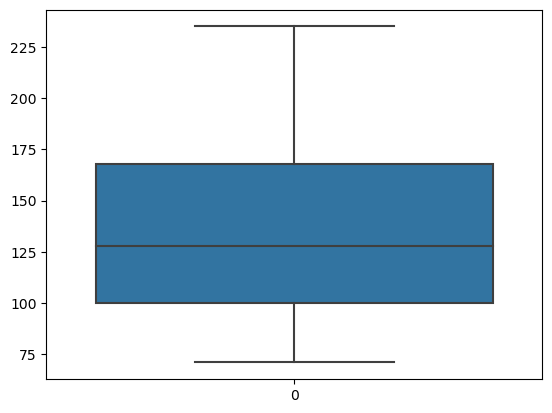

In [11]:
sns.boxplot(data['LoanAmount'])

In [12]:
data['LoanAmount'].skew()

0.6231463951818582

In [13]:
data['LoanAmount'].quantile(0.20)

95.0

In [14]:
data['LoanAmount'].quantile(0.90)

234.89999999999998

In [15]:
data['LoanAmount'].quantile(0.10)

71.0

<Axes: >

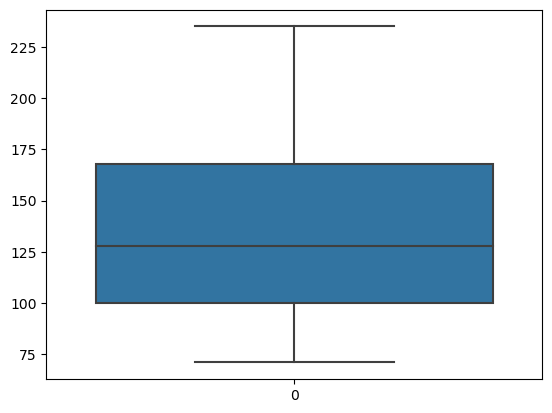

In [16]:
sns.boxplot(data['LoanAmount'])

In [17]:
data['LoanAmount']=np.where(data['LoanAmount'] > 235,235,data['LoanAmount'])

In [18]:
data['LoanAmount']=np.where(data['LoanAmount'] < 71,71,data['LoanAmount'])

<Axes: >

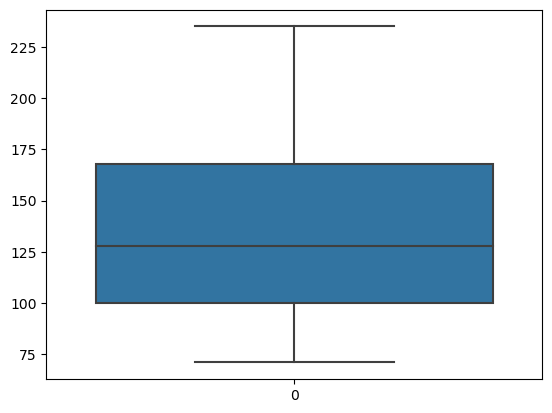

In [19]:
sns.boxplot(data['LoanAmount'])

In [29]:
data['LoanAmount']=np.where(data['LoanAmount'] > 182,182,data['LoanAmount'])

In [30]:
data['LoanAmount']=np.where(data['LoanAmount'] < 95,95,data['LoanAmount'])

<Axes: >

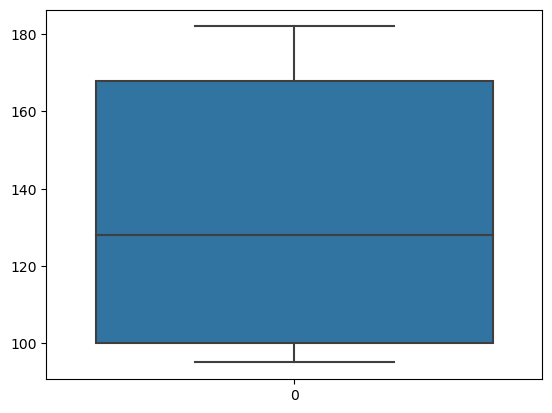

In [31]:
sns.boxplot(data['LoanAmount'])

## method 2 - Outlier trim

<Axes: >

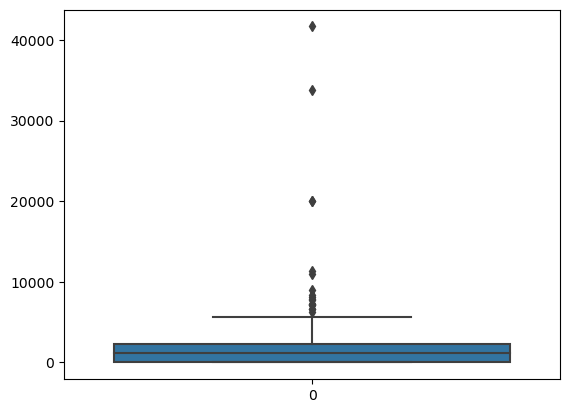

In [32]:
sns.boxplot(data['CoapplicantIncome'])

In [33]:
data['CoapplicantIncome'].quantile(0.20)

0.0

In [34]:
data['CoapplicantIncome'].quantile(0.80)

2535.0000000000005

In [35]:
x=data[(data['CoapplicantIncome'] < 0) | (data['CoapplicantIncome'] > 2535)].index

In [36]:
x

Index([  5,   9,  12,  13,  19,  21,  24,  30,  34,  38,
       ...
       577, 579, 581, 585, 590, 593, 600, 601, 603, 605],
      dtype='int64', length=123)

## step3- drop the values present in the indexes obtained from step 2

In [37]:
data['CoapplicantIncome']=data['CoapplicantIncome'].drop(x)

<Axes: >

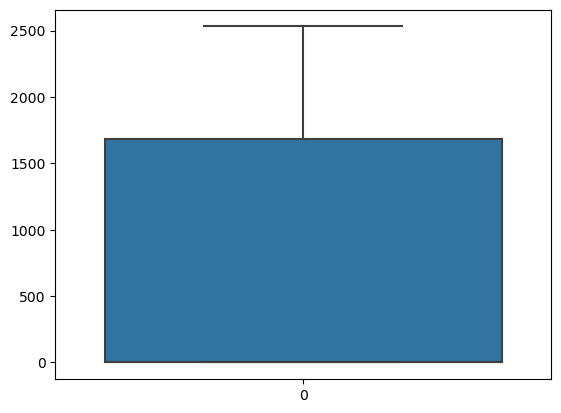

In [38]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: >

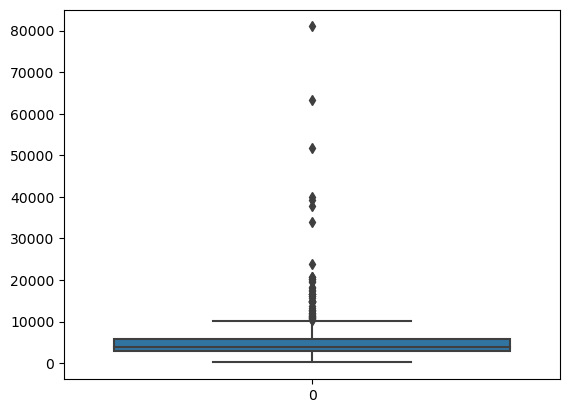

In [39]:
sns.boxplot(data['ApplicantIncome'])

## Log transformation method

In [40]:
np.log(10)

2.302585092994046

In [41]:
np.log(100)

4.605170185988092

In [42]:
np.log(1000)

6.907755278982137

In [43]:
np.log(10000)

9.210340371976184

In [44]:
np.log(50000)

10.819778284410283

In [45]:
data['ApplicantIncome_log']=np.log(data['ApplicantIncome'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,95.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515


<Axes: >

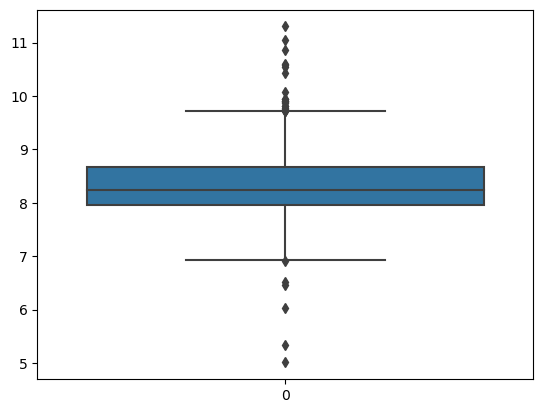

In [46]:
sns.boxplot(data['ApplicantIncome_log']) #This method is not suitable because it will not clear the outliers

In [210]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

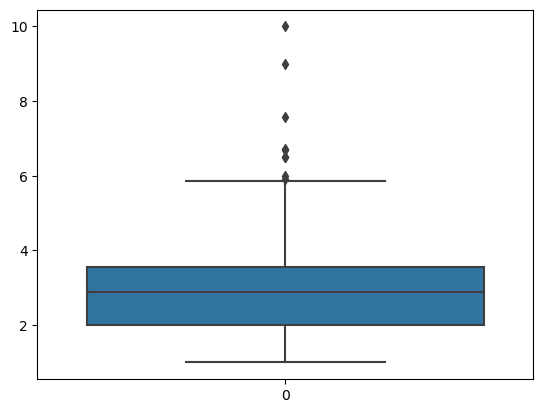

In [174]:
sns.boxplot(tips['tip'])

## method 5: replace the outliers with the median of the column

### step 1
### calculate 85th percentile of the data, 15th percentile of the data, 50th percentile of the data.


In [211]:
tips['tip'].quantile(0.85)

4.1955

In [212]:
tips['tip'].quantile(0.15)

1.7389999999999999

In [177]:
tips['tip'].median()

2.9

In [163]:
tips['tip'].quantile(0.50)

2.9

In [213]:
tips['tip']=np.where(tips['tip'] > 3.9,2.9,tips['tip'])

In [214]:
tips['tip']=np.where(tips['tip'] < 1.7,2.9,tips['tip'])

<Axes: >

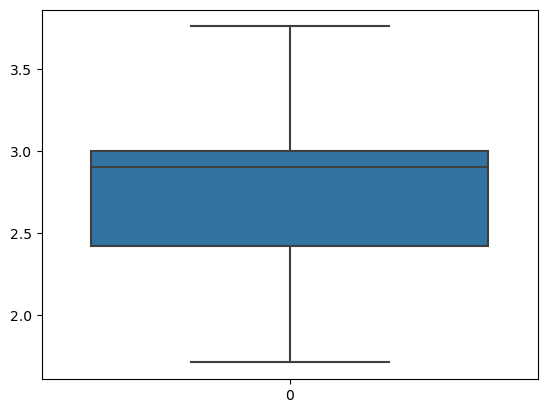

In [215]:
sns.boxplot(tips['tip'])

## method 6: IQR

In [219]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [221]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [223]:
Q1=data['ApplicantIncome'].quantile(0.25)
Q1

2877.5

In [224]:
Q3=data['ApplicantIncome'].quantile(0.75)
Q3

5795.0

In [225]:
IQR=Q3-Q1
IQR

2917.5

## step2
### find the upper whisker and lower whisker of the data

In [226]:
lw=Q1 - 1.5 * IQR
lw

-1498.75

In [227]:
uw=Q3 + 1.5 * IQR
uw

10171.25

## step3
### replace the outliers with IQR values

In [4]:
data['ApplicantIncome']=np.where(data['ApplicantIncome'] > 10171.25,5795,data['ApplicantIncome'])

In [5]:
data['ApplicantIncome']=np.where(data['ApplicantIncome'] < -1498.75,2877,data['ApplicantIncome'])

<Axes: >

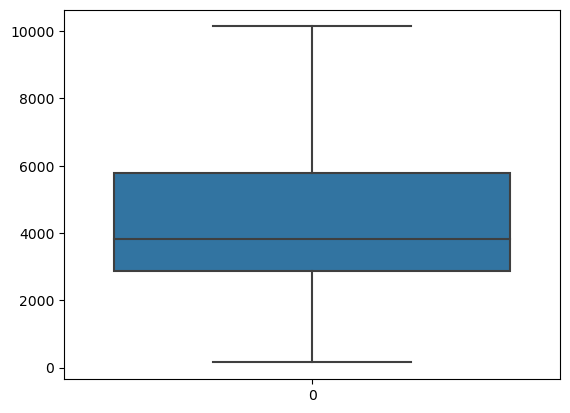

In [6]:
sns.boxplot(data['ApplicantIncome'])